<a href="https://colab.research.google.com/github/Alter1205/machine-learning-course/blob/master/btvn_week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# Compute distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist
np.random.seed(1)

In [4]:
means = [[1, 1], [5, 4]]
cov = [[.5, .3], [.3, .5]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.vstack((X0, X1)).T #data
y = np.hstack((np.ones((1, N)), -1*np.ones((1, N)))) #lable

In [7]:
#solving the problem
from cvxopt import matrix, solvers
# build V
# your code is here 
V = np.concatenate((X0.T, -X1.T), axis = 1)
##########

# your code is here
K = matrix(V.T.dot(V))
##########

p = matrix(-np.ones((2*N, 1))) # all-one vector 
# build A, b, G, h 
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1))) 


solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

alpha = np.array(sol['x'])
print('lambda = ')
print(alpha.T)

lambda = 
[[1.02135278e-10 6.46457762e-11 6.74379417e-11 1.35852869e-10
  5.84960184e-11 4.38201888e-11 1.47058579e-10 5.97061557e-11
  1.08762824e-10 1.05926849e-10 7.70331579e-11 5.56002794e-11
  4.14738625e-10 5.89467264e-11 1.00220940e-10 3.55909535e-01
  5.63297304e-11 7.27530678e-11 1.08835003e-10 4.31834205e-11
  5.08104916e-11 1.97019568e-08 3.96874369e-11 3.55909514e-01
  4.18493296e-11 4.81273262e-11 3.94925157e-11 7.64854094e-11
  6.21756592e-11 1.00123647e-10 5.18790207e-11 1.54021705e-10
  8.50279830e-11 6.59016941e-11 7.39115799e-11 3.09957614e-11
  1.48840914e-09 7.58818067e-11 5.31274093e-11 4.87628134e-11]]


In [9]:
# Finding support vector
epsilon = 1e-5 # just a small number, greater than 1e-9
S = np.where(alpha > epsilon)[0]
alphaS = alpha[S]

In [10]:

alphaS

array([[0.35590953],
       [0.35590951]])

In [16]:
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
# calculate w and b
### your code is here
epsilon = 1e-6 # just a small number, greater than 1e-9
S = np.where(alpha > epsilon)[0]
lS = alpha[S]
w = VS.dot(lS)
b = np.mean(yS.T - w.T.dot(XS))
###########


print('w = ', w.T)
print('b = ', b)

w =  [[-0.74560231 -0.39483678]]
b =  3.0958788810922373


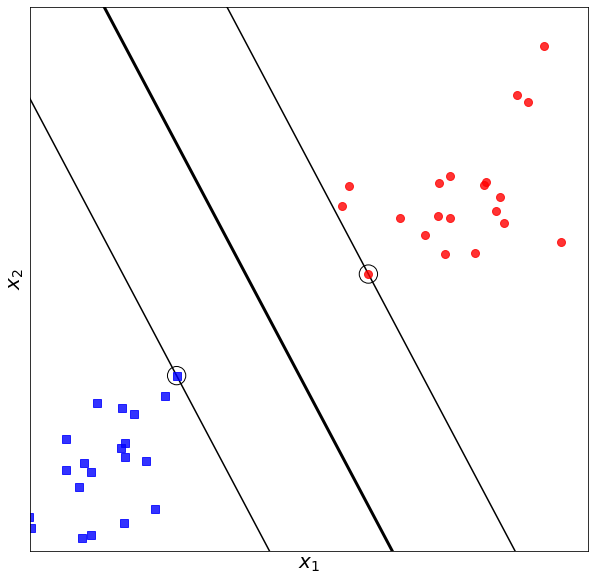

In [17]:
def plot(w, b, X0, X1, X, S):
  fig, ax = plt.subplots(figsize=(10,10))
  x1 = np.arange(-10, 10, 0.1)
  y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
  y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
  y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
  plt.plot(x1, y1, 'k', linewidth = 3)
  plt.plot(x1, y2, 'k')
  plt.plot(x1, y3, 'k')


  # y4 = 10*x1
  # plt.plot(x1, y1, 'k')
  # plt.fill_between(x1, y1, color='red', alpha=0.1)
  # plt.fill_between(x1, y1, y4, color = 'blue', alpha = .1)


  plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

  plt.axis('equal')
  plt.ylim(np.min(X[1, :])*1.05, np.max(X[1, :])*1.05)
  plt.xlim(np.min(X[0, :])*1.05, np.max(X[0, :])*1.05)

  # hide tikcs 
  cur_axes = plt.gca()
  cur_axes.axes.get_xaxis().set_ticks([])
  cur_axes.axes.get_yaxis().set_ticks([])

  # add circles around support vectors 
  for m in S:
      circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
      ax.add_artist(circle)


  plt.xlabel('$x_1$', fontsize = 20)
  plt.ylabel('$x_2$', fontsize = 20)
  plt.show()
plot(w, b, X0, X1, X, S)